In [1]:
import pandas as pd

In [4]:
df=pd.read_csv('C:/Users/Administrator/Downloads/cars.csv')

In [5]:
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [8]:
from sklearn.linear_model import LinearRegression

In [16]:
df['Car'].nunique()

17

In [17]:
df['Model'].nunique()

35

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [19]:
df.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

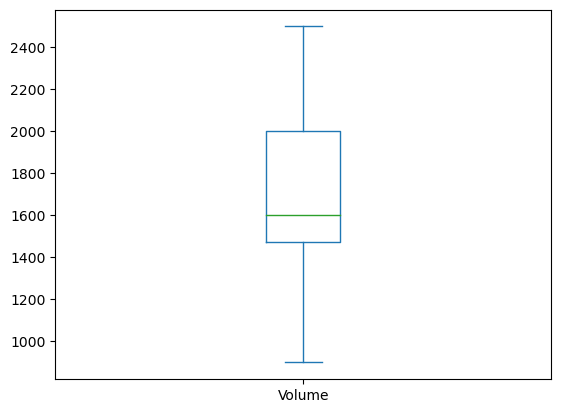

In [27]:
df['Volume'].plot(kind='box')
plt.xlabel='Volume'
plt.title='Volume Boxplot'

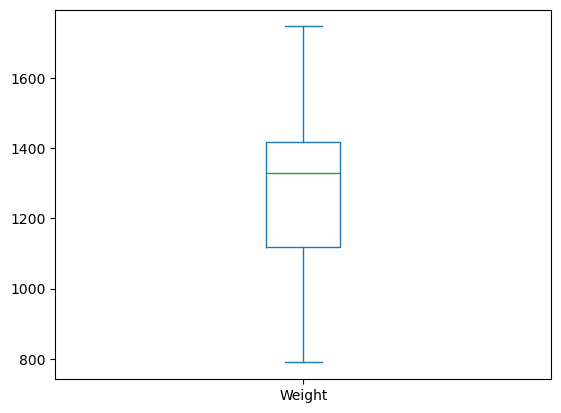

In [28]:
df['Weight'].plot(kind='box')
plt.xlabel='weight'
plt.title='weight Boxplot'

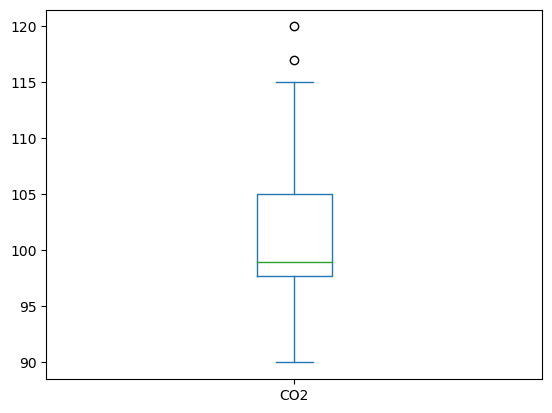

In [29]:
df['CO2'].plot(kind='box')
plt.xlabel='co2'
plt.title='co2 Boxplot'

In [34]:
Q1 = df['CO2'].quantile(0.25)
Q3 = df['CO2'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5 * IQR

outliers = df[(df['CO2'] < Q1 - threshold) | (df['CO2'] > Q3 + threshold)]


In [35]:
outliers

,Car,Model,Volume,Weight,CO2
31,Volvo,XC70,2000,1746,117
35,Mercedes,SLK,2500,1395,120


In [37]:
df[(df['CO2'] < Q1 - threshold) | (df['CO2'] > Q3 + threshold)].index

Index([31, 35], dtype='int64')

In [39]:
df.drop([31,35],axis=0)

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [51]:
from sklearn.model_selection import train_test_split
df=df.drop(['Car','Model'],axis=1)
x=df.drop(['CO2'],axis=1)
y=df['CO2']

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

In [58]:
from sklearn.metrics import r2_score
y_pred=lr.predict(x_test)

In [61]:
r2=r2_score(y_test,y_pred)
r2

0.32941109624012743

In [66]:
import statsmodels.api as sm

# Adding a constant term to the features (intercept)
x_train_with_const = sm.add_constant(x_train)

# Fitting the linear regression model
model = sm.OLS(y_train, x_train_with_const).fit()

# Get the summary of the regression results
summary = model.summary()

# Extract the p-values
p_values = model.pvalues


In [67]:
p_values

const     1.177422e-13
Volume    3.839536e-01
Weight    2.580665e-01
dtype: float64

In [68]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     4.381
Date:                Thu, 09 May 2024   Prob (F-statistic):             0.0234
Time:                        17:46:20   Log-Likelihood:                -86.914
No. Observations:                  28   AIC:                             179.8
Df Residuals:                      25   BIC:                             183.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.2150      5.820     14.471      0.000      72.229      96.201
Volume         0.0043      0.005      0.886      0.384      -0.006       0.014
Weight         0.0080      0.007      1.157      0.258      -0.006       0.022
==============================================================================
Omnibus:                        2.754   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.252   Jarque-Bera (JB):                1.399
Skew:                          -0.177   Prob(JB):                        0.497
Kurtosis:                       1.964   Cond. No.                     1.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""